In [2]:
!pip install kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 79% 129M/163M [00:00<00:00, 1.35GB/s]
100% 163M/163M [00:00<00:00, 1.24GB/s]


In [7]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Dataset extraction successful!')

Dataset extraction successful!


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models

In [9]:
with_mask_files = os.listdir('/content/data/with_mask')

without_mask_files = os.listdir('/content/data/without_mask')

In [10]:
print("Number of images with mask: ",len(with_mask_files))
print("Number of images without mask: ",len(without_mask_files))

Number of images with mask:  3725
Number of images without mask:  3828


Labels

with mask --> 0

without mask -->1

In [11]:
with_mask_labels = [1]*len(with_mask_files)
without_mask_labels = [0]*len(without_mask_files)

labels = with_mask_labels + without_mask_labels

Process the image to be uniform in size

In [12]:
with_mask_path = '/content/data/with_mask/'
without_mask_path = '/content/data/without_mask/'
data = []

for eachImg in with_mask_files:
  image = Image.open(with_mask_path + eachImg)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

for eachImg in without_mask_files:
  image = Image.open(without_mask_path + eachImg)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
X = np.array(data)
Y= np.array(labels)

Train and Test data spilt

In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [15]:
x_train = x_train/255.0
x_test = x_test/255.0

In [16]:
numClasses = 2

model = keras.Sequential()

#1st conolutional layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#2nd convolutional layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#flatten
model.add(layers.Flatten())

#dense layer 1
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))

#dense layer 2
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))

#final/output layer
model.add(layers.Dense(numClasses,activation='sigmoid'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(x_train,y_train,epochs=5)


Epoch 1/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.7159 - loss: 0.5955
Epoch 2/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8772 - loss: 0.3049
Epoch 3/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8997 - loss: 0.2399
Epoch 4/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9152 - loss: 0.1959
Epoch 5/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9249 - loss: 0.1798


In [19]:
loss,accuracy = model.evaluate(x_test,y_test)
print(f"Test accuracy: {accuracy} | Test loss: {loss}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9150 - loss: 0.2417
Test accuracy: 0.9238914847373962 | Test loss: 0.21988405287265778


In [28]:
class_names = ['With Mask','Without Mask']

In [38]:
def predict_custom_image(model, img_path):

  # 1. Load and resize the image
  img = Image.open(img_path)
  # The model expects 128x128 images
  img = img.resize((128, 128))

  # 2. Convert to NumPy array and normalize
  img_array = np.array(img)
  img_array = img_array / 255.0


  img_batch = np.expand_dims(img_array, axis=0)

  # 4. Make a prediction
  prediction = model.predict(img_batch)
  pred_class_index = np.argmax(prediction[0])
  confidence = np.max(prediction[0]) * 100
  predicted_class_name = class_names[pred_class_index]

  # 5. Display the result
  plt.figure(figsize=(6, 6))
  plt.imshow(img)
  plt.title(f"Predicted: {predicted_class_name}\nConfidence: {confidence:.2f}%")
  plt.axis('off')
  plt.show()

  print(f"The model predicted this image is a: {predicted_class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


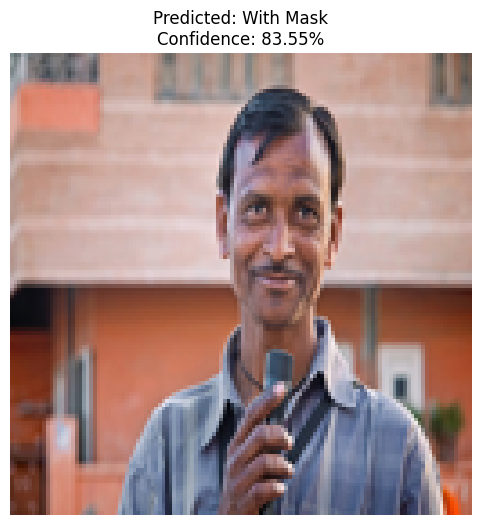

The model predicted this image is a: With Mask


In [43]:
imgPath = '/content/custom_datasets/img6.jpg'
predict_custom_image(model,imgPath)